In [239]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [240]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import matplotlib.image as mpimg
from PIL import Image
import json
import torch.nn as nn
from collections import OrderedDict

In [241]:
train_transforms = transforms.Compose([
transforms.RandomRotation(43),
transforms.RandomHorizontalFlip(),
transforms.RandomVerticalFlip(),
transforms.RandomResizedCrop(224),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [242]:
dataset_dir='flowers'

trg_set =datasets.ImageFolder(root=dataset_dir + '/train',transform=train_transforms)


In [243]:
trainloader = torch.utils.data.DataLoader(trg_set, batch_size=64, shuffle=True)


In [244]:
def viz_img(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [245]:
image, label = next(iter(trainloader))

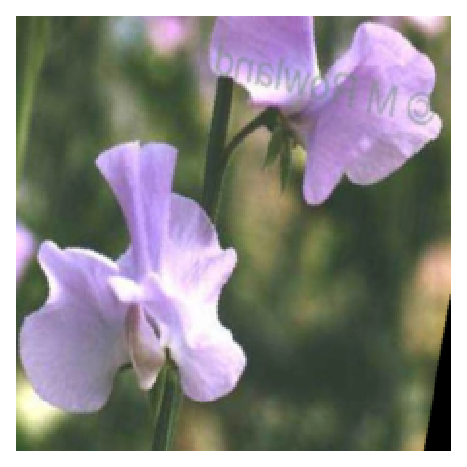

In [246]:
viz_img(image[0,:]);

In [247]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import numpy as np
import time

import torch
from torch import nn
from torch import optim

import torch.nn.functional as F

from torchvision import datasets, transforms

from collections import OrderedDict

In [248]:
# Network layer design decision on network components for designed network
fm_input = 784
fm_out= 10
fm_hidden =[392,196,98,19]

##Let us build our new mnist net
fm_model =nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(fm_input, fm_hidden[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(fm_hidden[0], fm_hidden[1])),
                      ('relu2', nn.ReLU()),
                      ('fc3', nn.Linear(fm_hidden[1], fm_hidden[2])),
                      ('relu3', nn.ReLU()),
                      ('fc4', nn.Linear(fm_hidden[2], fm_hidden[3])),
                      ('relu4', nn.ReLU()),
                      ('logits', nn.Linear(fm_hidden[3], fm_out))]))

                        

In [249]:
fm_cmp_crite = nn.CrossEntropyLoss()
fm_optimizer = optim.SGD(fm_model.parameters(), lr=0.01)

In [250]:
# TODO: Train the network here
# First let us do one pass and see what happens
#print('Initial weights - ', fm_model.fc1.weight)

fm_images, fm_labels = next(iter(trainloader))

In [251]:
type(fm_labels)

torch.Tensor

In [252]:
print('Initial weights - ', fm_model.fc1.weight)

Initial weights -  Parameter containing:
tensor([[ 2.1427e-02,  1.5104e-03, -1.5289e-02,  ..., -2.8014e-03,
         -2.6808e-02,  8.5356e-03],
        [-4.0885e-03, -2.0924e-02, -1.4570e-02,  ..., -2.2679e-02,
          9.9089e-03,  5.8504e-03],
        [-1.8760e-02, -1.2512e-02, -3.3626e-02,  ..., -2.7247e-02,
          2.6582e-02,  2.8530e-02],
        ...,
        [-1.6477e-02, -7.6401e-04, -3.4279e-02,  ..., -3.4004e-02,
          6.3599e-03, -2.0780e-02],
        [ 3.5613e-03,  5.3904e-03,  2.4291e-02,  ...,  3.0334e-02,
          1.3681e-02,  4.3444e-04],
        [-1.5512e-02,  2.9376e-02,  1.5591e-02,  ..., -3.8976e-03,
          2.0253e-02, -1.2458e-02]])


In [253]:
fm_images.resize_(34, 784)


tensor([[-2.1179, -2.1179, -2.1179,  ..., -0.4739, -0.4739, -0.5082],
        [-0.5253, -0.5424, -0.5082,  ..., -0.6965, -0.6965, -0.6794],
        [-2.1179, -2.1179, -2.1179,  ..., -0.4397, -0.4397, -0.4397],
        ...,
        [-0.4054, -0.4054, -0.3712,  ..., -0.0116, -0.8849, -1.4329],
        [-0.7479, -0.7308, -0.6623,  ..., -0.9192, -0.7993, -0.8164],
        [-0.9877, -1.2103, -1.3644,  ...,  0.8961,  0.5364, -0.6281]])

In [254]:

# Clear the gradients, do this because gradients are accumulated
fm_optimizer.zero_grad()



In [255]:
# Forward pass, then backward pass, then update weights
fm_output = fm_model.forward(fm_images)


In [256]:
fm_loss = fm_cmp_crite(fm_output, fm_labels)



In [257]:

fm_loss.backward()
print('Gradient -', fm_model.fc1.weight.grad)
fm_optimizer.step()

Gradient - tensor([[-2.6878e-04, -2.5411e-04, -2.4858e-04,  ..., -1.0076e-04,
         -4.0314e-05, -4.5755e-05],
        [-6.6622e-05, -6.8357e-05, -7.2089e-05,  ...,  5.1536e-05,
          3.7772e-05,  1.2781e-05],
        [-1.5753e-04, -1.6038e-04, -1.5323e-04,  ...,  5.4066e-05,
         -5.0236e-05, -1.3839e-04],
        ...,
        [-1.3017e-04, -1.2913e-04, -1.0658e-04,  ..., -1.7509e-04,
         -2.3565e-04, -2.9002e-04],
        [ 1.9701e-06, -4.7288e-06, -9.5890e-06,  ..., -1.7143e-05,
         -2.4643e-05, -7.5876e-06],
        [-3.5827e-04, -3.5317e-04, -3.3119e-04,  ..., -1.0089e-04,
         -1.0113e-04,  3.9135e-05]])


In [258]:
print('Updated weights - ', fm_model.fc1.weight)

Updated weights -  Parameter containing:
tensor([[ 2.1430e-02,  1.5129e-03, -1.5287e-02,  ..., -2.8004e-03,
         -2.6808e-02,  8.5361e-03],
        [-4.0878e-03, -2.0923e-02, -1.4569e-02,  ..., -2.2679e-02,
          9.9085e-03,  5.8503e-03],
        [-1.8759e-02, -1.2511e-02, -3.3624e-02,  ..., -2.7248e-02,
          2.6582e-02,  2.8532e-02],
        ...,
        [-1.6476e-02, -7.6272e-04, -3.4278e-02,  ..., -3.4002e-02,
          6.3623e-03, -2.0777e-02],
        [ 3.5613e-03,  5.3905e-03,  2.4291e-02,  ...,  3.0334e-02,
          1.3681e-02,  4.3452e-04],
        [-1.5508e-02,  2.9380e-02,  1.5594e-02,  ..., -3.8966e-03,
          2.0254e-02, -1.2459e-02]])


In [259]:
#Let us do the real training now.. One pass is sucessful as we can see above
fm_cmp_crite = nn.CrossEntropyLoss()
fm_optimizer = optim.SGD(fm_model.parameters(), lr=0.003)

In [260]:
#Initialise
fm_epochs = 4
print_every = 50
steps = 0
print("\n Start epoch")
for cnt_epochs in range (fm_epochs):
    fm_rt_loss=0
    print("\n set loss zero")

    for fm_images, fm_labels in iter(trainloader):
        print("\n images and labels set")
        steps = steps + 1
        ## lets us steam roll images to 784 size vector by beating it down
        fm_images.resize_(fm_images.size()[0],784)
        print("\n images and labels resized ")

        fm_optimizer.zero_grad()
        print("\n optimiser zero grad ed")

        ## Forward pass -do output and loss 
        fm_output = fm_model.forward(fm_images)
        print("\n output from fwd pass done")
        fm_loss = fm_cmp_crite(fm_output,fm_labels) 
        print("\n loss from criteris set")

        ## Backward pass - pick up forward loss, propagate back and optimise
        fm_loss.backward()
        print("\n loss from backward pass done")

        fm_optimizer.step()
        print("\n optimiser step done")

        ##cal total loss for all epochs
        fm_rt_loss = fm_rt_loss+fm_loss.item()
        print("\n lrunning loss done")

        if steps % print_every == 0:
            print("Epoch no : .. ",fm_epochs)
            print ("Loss: ",(fm_rt_loss/print_every))
            fm_rt_loss = 0


 Start epoch

 set loss zero

 images and labels set

 images and labels resized 

 optimiser zero grad ed

 output from fwd pass done

 loss from criteris set

 loss from backward pass done

 optimiser step done

 lrunning loss done

 set loss zero

 images and labels set

 images and labels resized 

 optimiser zero grad ed

 output from fwd pass done

 loss from criteris set

 loss from backward pass done

 optimiser step done

 lrunning loss done

 set loss zero

 images and labels set

 images and labels resized 

 optimiser zero grad ed

 output from fwd pass done

 loss from criteris set

 loss from backward pass done

 optimiser step done

 lrunning loss done

 set loss zero

 images and labels set

 images and labels resized 

 optimiser zero grad ed

 output from fwd pass done

 loss from criteris set

 loss from backward pass done

 optimiser step done

 lrunning loss done


In [261]:
# Test out your network!

dataiter = iter(trainloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)


In [262]:
img

tensor([[-1.8953, -1.6042, -0.7993, -0.3369,  0.0569,  0.3138,  0.5193,
          0.5707,  0.5364,  0.5707,  0.5707,  0.5536,  0.5364,  0.5022,
          0.5022,  0.5022,  0.5022,  0.5193,  0.5193,  0.4851,  0.4851,
          0.5022,  0.4851,  0.4508,  0.3994,  0.3652,  0.3309,  0.2967,
          0.3138,  0.3138,  0.3309,  0.3138,  0.2967,  0.2624,  0.2453,
          0.2282,  0.2111,  0.2111,  0.1939,  0.1768,  0.1597,  0.1597,
          0.1426,  0.1083,  0.0741,  0.0569,  0.0741,  0.0569,  0.0569,
          0.0569,  0.0912,  0.1083,  0.1083,  0.1083,  0.1254,  0.1254,
          0.1254,  0.1254,  0.1254,  0.1083,  0.1254,  0.1426,  0.1083,
          0.0741,  0.1426,  0.2282,  0.2111,  0.1254, -0.0458, -0.0972,
          0.2624,  0.7933,  1.0673,  1.0673,  1.0673,  1.1015,  1.0159,
          1.1529,  1.3755,  1.3242,  1.2214,  1.4269,  1.7523,  1.6667,
          1.4440,  1.4269,  1.2557,  1.3927,  1.5639,  1.5810,  1.5982,
          1.6153,  1.5468,  1.3755,  1.4612,  1.4440,  1.4954,  

In [264]:
with torch.no_grad():
    logits = fm_model.forward(img)

ps = F.softmax(logits, dim=1)
#ps = F.logsoftmax(logits, dim=1)


In [265]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable

In [266]:
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
##Set labels from Json    

In [267]:
graplablesl = list(cat_to_name.values())

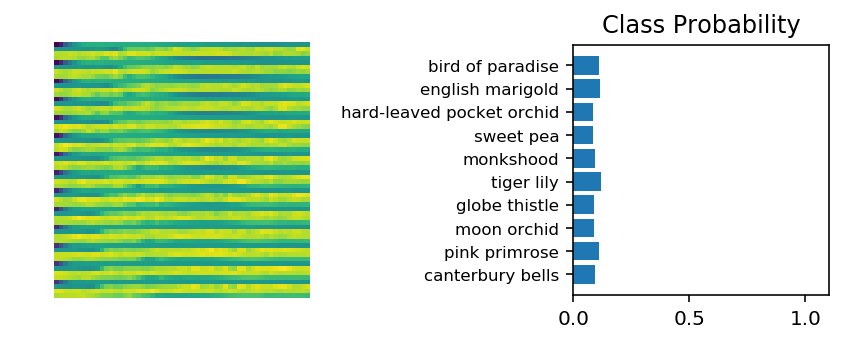

In [268]:
ps = ps.data.numpy().squeeze()
#ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())

fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(img.resize_(1,56,56).numpy().squeeze())
ax1.axis('off')
ax2.barh(np.arange(10), ps)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(graplablesl, size='small');
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)

plt.tight_layout()

In [270]:
checkpoint = {
    'arch': 'OwnNet',
    'doneBy':'Richard Vijay',
    'date':'22-07-18',
    'hiddenUnitSc':'392,196,98,19', 
    'hiddenlayersC': '4',
    'lastNNLayerCust':'none',
    'optimizer':'SGD',
    'learningrt':'0.01',
    'state_dict': fm_model.state_dict()
}


In [271]:
torch.save(fm_model.state_dict(), 'FlowerWithOwnNet_checkpoint1.pth')